# Seaborn

By convention, we import seaborn as `sns`.<br/>A cool feature with Seaborn is that it comes with a few built-in datasets. You can call them with the `load_dataset()` method.

One of those datasets is a '_tips_' dataset that shows who gave what tip at a restaurant.

When importing, you will notice that you can handle the dataset like a **Pandas** dataframe with the `head()` and `tail()` method.

In [1]:
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## The Distribution Plot

### `dist` plot

The dist plot allows us to represent the distribution of a uni-variable (one variable) set of observations.

At the time of writing it (May 2022) it is still possible to call the `distplot` for this. However, the plot will be depriciated and replaced by `displot`.

For the documentation, however, the depreciated graph is better. Note that we have 2 graphs on top of each other:
- a histogram (the bars)
- a kde plot (the line)

/home/nootaku/miniconda3/envs/datascience/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

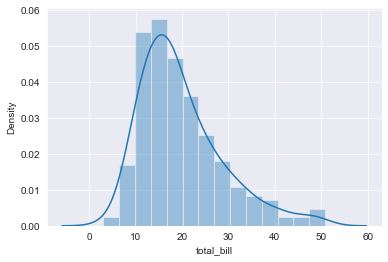

In [3]:
sns.distplot(tips['total_bill'])

We can now acchieve a similar result with the new version of the plot by adding the `kde=True` argument.

Please find the documentation [here](https://seaborn.pydata.org/generated/seaborn.displot.html)

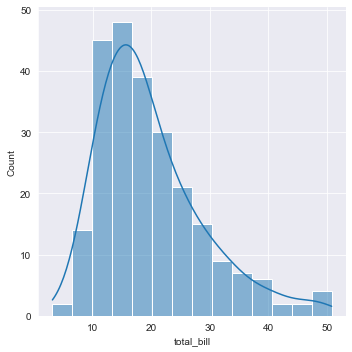

In [4]:
sns.displot(tips['total_bill'], kde=True)

### Exploring the arguments

#### Histogram

A histogram can be created by using the `kind` argument and set it to `hist` or by calling `sns.histplot()`.

```python
sns.displot(dataSeries, kind='hist')

# is the same as
sns.histplot(dataSeries)
```

A histogram is a distribution of where our total bill lies. Here we can see that the majority of our bills are between $10 and $20.

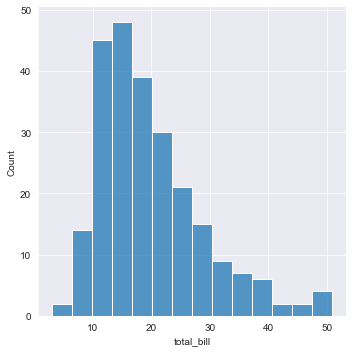

In [5]:
sns.displot(tips['total_bill'], kind='hist')

Each 'bar' contains a fixed amount of _**x values**_. To increase the amount of bars (decrease the amount of x values per bar), we can use the `bins` argument.

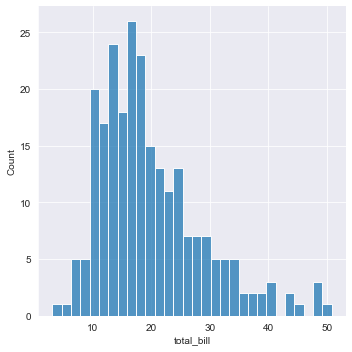

In [6]:
sns.displot(tips['total_bill'], kind='hist', bins=30)

#### Rugplot

A rugplot is a very simple plot that draws one line for every value of a dataseries. Instead of an histogram, it does not count how many counts of values are part of a bin.

It can be created with: `sns.displot(dataSeries, rug=True)` or with `sns.rugplot(dataSeries)`.

<AxesSubplot:xlabel='total_bill'>

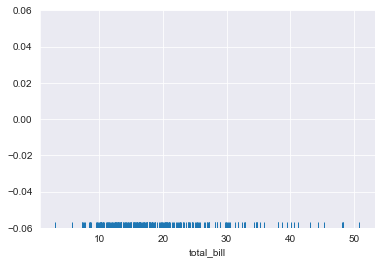

In [7]:
sns.rugplot(tips['total_bill'])

#### KDE

KDE stands for Kernel Density Estimation. It is the sum of all the Gaussian Distribution graphs (or Normal distribution).

_**Normal Distribution**_

<img src="https://upload.wikimedia.org/wikipedia/commons/7/74/Normal_Distribution_PDF.svg" width="400" height="280" />

_**KDE**_

<img src="https://upload.wikimedia.org/wikipedia/commons/4/41/Comparison_of_1D_histogram_and_KDE.png" width="600" height="280" />


## Joint plots

A joint plot is a tool that allows to graphically compare 2 dist plots. In other words it allows to visualise the correlation (or absence thereof) between two data series.

The documentation can be found [here](https://seaborn.pydata.org/generated/seaborn.jointplot.html).

A joint plot (`sns.jointplot()`) takes 3 arguments:
- `x`: Column name of the dataset to be compared as string
- `y`: Column name of the dataset to be compared as string
- `data`: The full dataset (not a series)

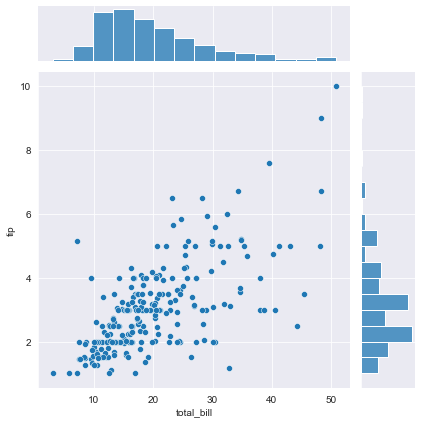

In [8]:
sns.jointplot(x='total_bill', y='tip', data=tips)

As we saw before, Seaborn has an argument called `kind`. This allows us to define what is going on in the center of our graph.

By default, we see a **scatter** graph. But would we want it we could display a **hexagon map** using `kind='hex'`.

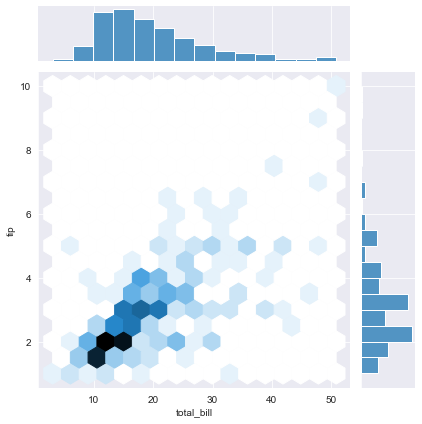

In [9]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

Another interseting kind is the **regression**. A regression looks like a scatterplot but with a regression line.

This is called using the `reg` kind

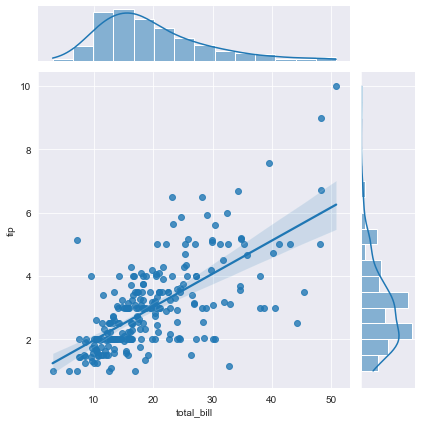

In [10]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')

## Pair plots
Pair plots will represent pair-wise relationships between data over an entire dataframe. Another way to phrase this is: pair plot will create a jointplot for every single combination of columns over a dataframe.

This works particularly well for numerical data and is a very efficient way to have a clear represtentation of the data we are working with.

_Note_<br/>_Depending on the size of the dataset, Pair Plots can take a while to be rendered._

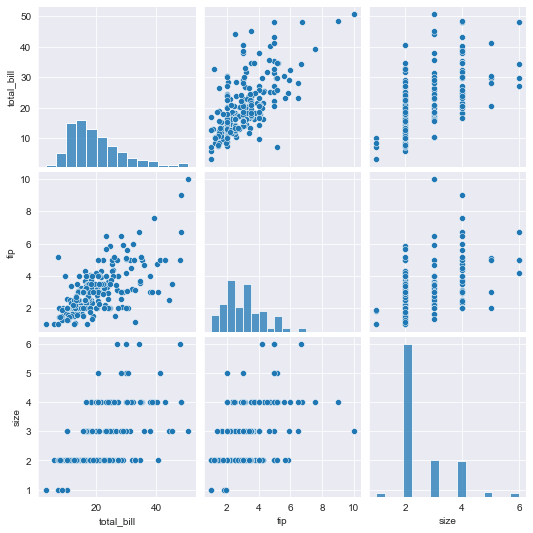

In [11]:
sns.pairplot(tips)

All the crated graphs are scatter plots except when a datasets is compared to itself. Then it's an histogram.

Now we can add a `hue` argument to the plot the pair plot per **category**. This means we need to have a column that has a finite number of categories defining the data.

For example, in our `tips` dataframe, we have a column calle `sex` that can be either `male` or `female`. When we call the `hue='sex'` it gives:

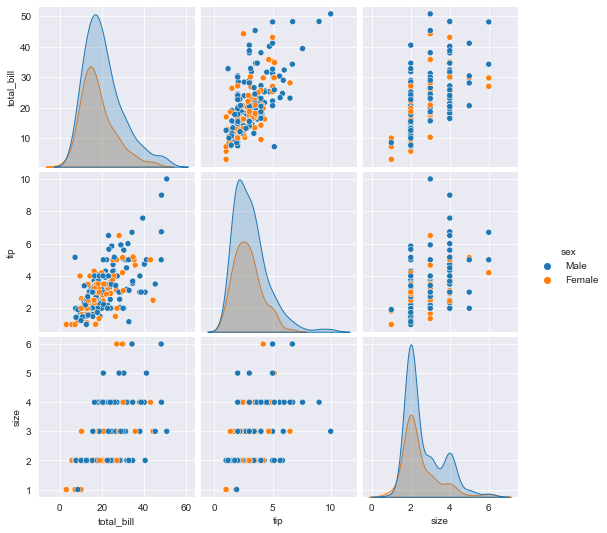

In [12]:
sns.pairplot(tips, hue='sex')

## Categorical Plots

Categorical plots are focused on the distribution of data within **categorical columns** (such as the _sex_ column we used here-above) in reference to either a numerical column or another categorical column. The generic version of the plots that follow are `sns.catplot()`. The documentation can be found [here](https://seaborn.pydata.org/generated/seaborn.catplot.html)

### Bar plot

Aggregates the categorical data based on a function. By default that function is the `mean()`. It can be thought of as the visualization of a group by action.

For example, in the graph below, you can see the average (`mean`) total_bill per `sex`.

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

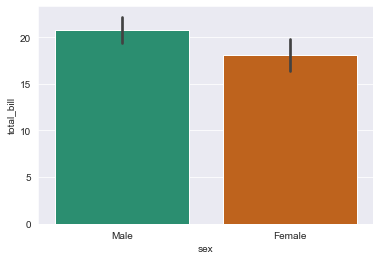

In [13]:
sns.barplot(x='sex', y='total_bill', data=tips)

If we would like to see another estimation than the 'average', we can do so with the `estimator` argument that accepts any aggregate function. For example, lets say we want to see the standard deviation per sex to see if there is more variance among male or among female:

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

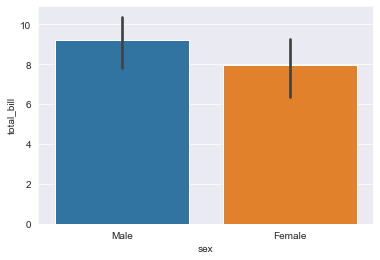

In [14]:
import numpy as np
sns.barplot(x='sex', y='total_bill', data=tips, estimator=np.std)

### Count plot

A Count plot is a barplot that exclusively counts the number of occurences of a category. It corresponds to the `count` method in Pandas.

This is why we only need to give it a `x` argument. (the `y` is always count)

<AxesSubplot:xlabel='sex', ylabel='count'>

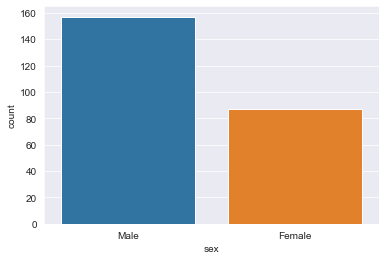

In [15]:
sns.countplot(x='sex', data=tips)

### Box plots and Violin plots

Box plots and Violin plots are used to show the distribution of categorical data. They show the distribution of categorical data in a way that facilitates comparison between variables.

#### Box plot

To render a boxplot use `sns.boxplot()`. This method takes 3 arguments:

- `x`: Column name of the categorical dataset as string
- `y`: Column name of the numerical dataset as string
- `data`: The full dataset (not a series)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

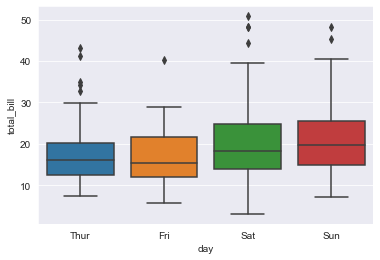

In [16]:
sns.boxplot(x='day', y='total_bill', data=tips)

How do we read this?

The boxes show the value of the x axis, whereas the whiskers show the rest of the distribution. The points outside of the whiskers are determined to be outliers.

For example:
Let's focus only on the blue box (thursday). We have four parts:
- from the bottom whisker to the bottom of the box
- from the bottom of the box to the line inside the box
- from the line inside the box to the top of the box
- from the top of the box to the top whisker

The data for Thursday spans from the bottom whisker to the top whisker.<br/>1/4 of the points are between the bottom whisker and the bottom of the box. Another 1/4 in the bottom part of the box. Yet another in the top part of the box. And the last 1/4 between the top of the box and the top whisker.

The mean total_bill for Thursdays is at 17.5 (or about) and this corresponds to the line in the middle of the blue box.

Since the data spans from the top to the bottom whisker, the line inside the box will not always be in the middle of the box.

#### Violin plot

The violin plot is just like the boxplot but adds an extra layer of information. Not only does it give the same information as a boxplot, it also graphically shows the KDE at the same time.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

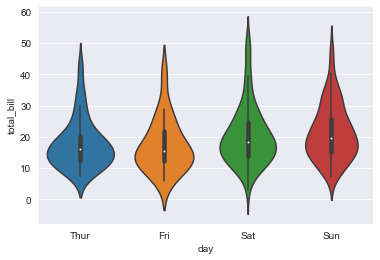

In [17]:
sns.violinplot(x='day', y='total_bill', data=tips)

#### Using the Hue

Just like almost evey graph of the seaborn library, it is possible to split these graphs by another categorical type using the `hue` argument.

Moreover, in the case of the violin plot, it is possible to have one side of the violin be one category and the other side be another category using the argument `split=True`.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

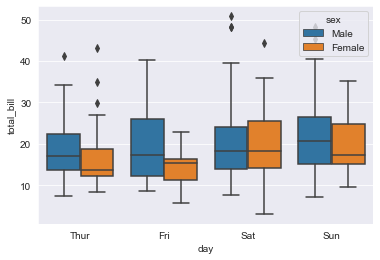

In [18]:
sns.boxplot(x='day', y='total_bill', data=tips, hue='sex')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

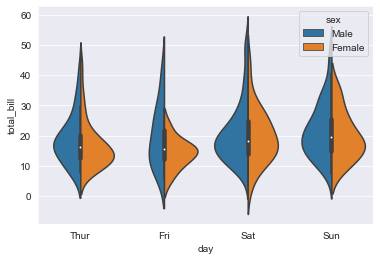

In [34]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True)

### The Strip Plot

A strip plot is a one-dimensional scatter plot.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

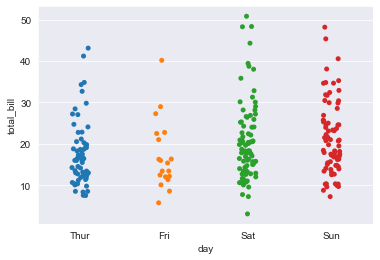

In [20]:
sns.stripplot(x='day', y='total_bill', data=tips)

### Swarm plot

A swarm plot is the fusion of a strip plot and a violin plot.

Swarm plots usually don't scale well for larger datasets.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

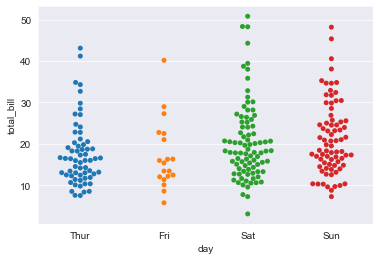

In [21]:
sns.swarmplot(x='day', y='total_bill', data=tips)

## Matrix Plots

A matrix plot allows to analyse the relationship between multiple datasets.

In order to have multiple datasets we will import a new sample dataset, the `flights` dataset.

In [22]:
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### Heatmaps

A heatmap represents relational data according to a gradient of color.

In order to create a heatmap, the data should already be in a ***matrix form***. This means that the index of a dataset should have a name. In other words, the integer-based system is not ok.

This can be achieved either by creating a correlation table (`pandas.corr()`) or a pivot table.

In [23]:
# Creating a matrix form with a Pandas correlation table
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

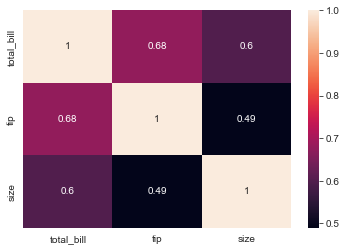

In [24]:
sns.heatmap(tips.corr(), annot=True)

In [25]:
# Creating a matrix form with a Pandas pivot table
fpt = flights.pivot_table(index='month', columns='year', values='passengers')
fpt

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

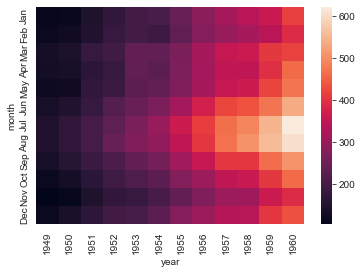

In [26]:
sns.heatmap(fpt)

### Cluster map

A cluster map is a clustered version of a heatmap.

With a clustermap, Seaborn will try to cluster rows and columns together based on their similarity.

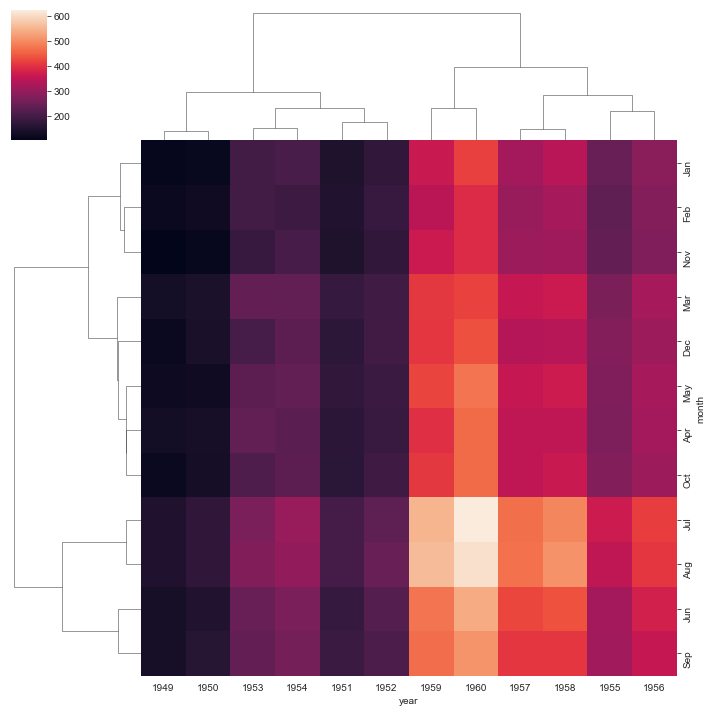

In [27]:
sns.clustermap(fpt)

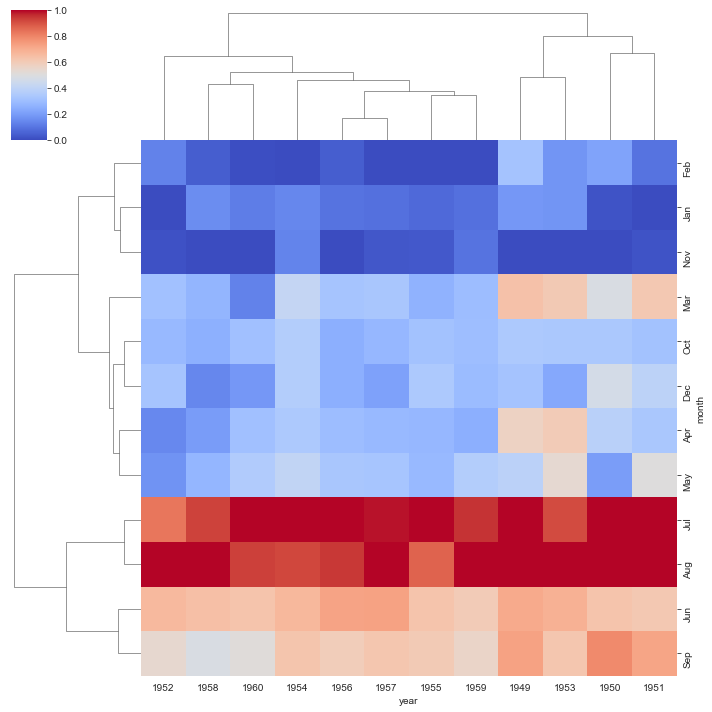

In [28]:
# Normalize the scale from 0 to 1
sns.clustermap(fpt, standard_scale=1, cmap='coolwarm')

## Regression Plots

### LM plot

The `lmplot` allows to display linear plots with Seaborn. It is a useful tool when working with linear regression models.

By default it looks identical to a `displot` of kind `reg`. The arguments are identical as well:

- x
- y
- data

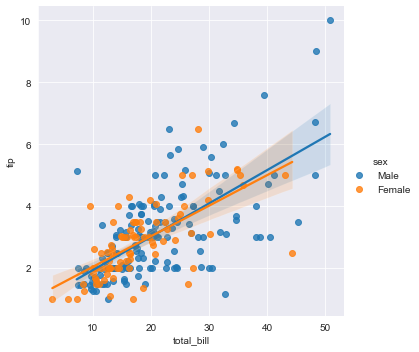

In [29]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex')

## Styling

### Markers

It is possible to call matplotlib arguments. This is a case by case usage, so referal to the documentation is required.

For example lets change the markers of our **lmplot**.

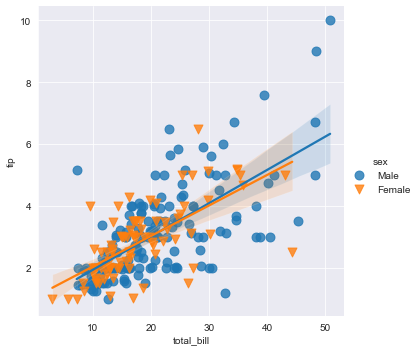

In [30]:
sns.lmplot(
    x='total_bill',
    y='tip', data=tips,
    hue='sex',
    markers=['o', 'v'],  # type of markers
    scatter_kws={'s': 80}  # size of markers
)

### Grid vs Hue

We could have different graphs. We can do this by calling the `cols` and `rows` arguments.
Theses arguments are taking the name of the column to split by.

Should there be a problem with the size and aspect ratio of the graphs, we should use the `aspect` and `height` argumentation.

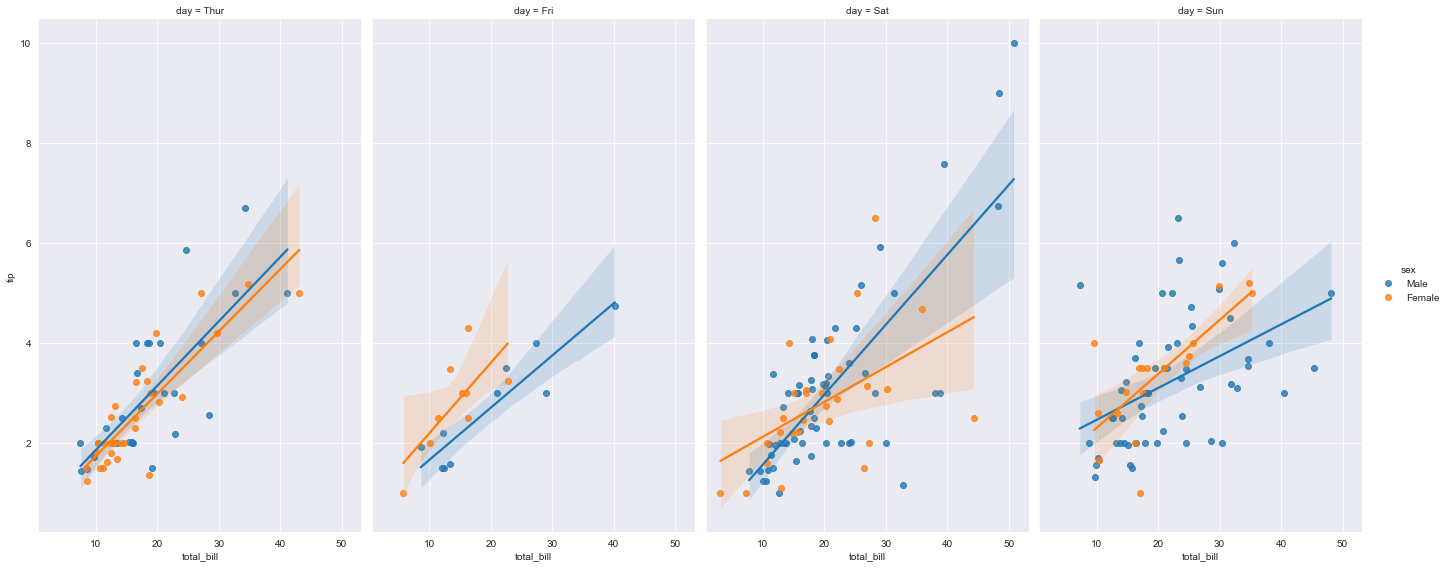

In [35]:
sns.lmplot(
    x='total_bill',
    y='tip',
    data=tips,
    col='day',
    hue='sex',
    aspect=0.6,
    height=8
)